# <font color='green'>  Multiple Linear Regression :</font>


- **Multiple Linear Regression (MLR)** is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. 





- The primary goal of MLR is to understand how the dependent variable changes in response to the independent variables and to make predictions based on this understanding. 

**Regression Equation:**

Where as :-

- **Y** :- is the dependent variable (target variable).
- **X1, X2, …, Xn** :- are the independent variables .
- **β0**:- is the intercept (constant term)
- **β1, β2, …, βn** :- coefficients for the independent variables
- **ε** :-  error term (residual)

### <font color='red'>Assumptions Linear Regression :</font>

- **1).Linearity**

The relationship between the dependent and independent variables is linear.


- **2).No Multicollinearity**


No multicollinearity between independent variables


Multicollinearity occurs when the independent variables are too highly correlated with each other.

- **3).Mean of the residuals should be zero**


The mean of the residuals is calculated by averaging all the residuals

- **4).Residual errors must be normally distributed**


The residual errors should be  follow the normally distributed.

- **5). No Heteroscedasticity**


The residual errors should have constant variance.

## <font color='red'> Multiple Linear Regression Model Buliding:</font>

- The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in   each of these markets for different media channels: TV, radio and newspaper.

- The sales are in thousands of units and the budget is in thousands of dollars.



- Dependent variable:---Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("C:/Users/USER/Desktop/M.L Data Set/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Remove columnname   Unnamed: 0 from the data
df = data.drop(columns=['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [6]:
df.shape

(200, 4)

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Boxplots** are a good way to visualize outliers

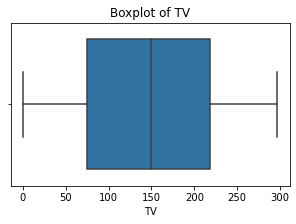

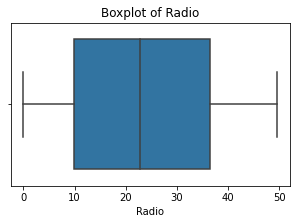

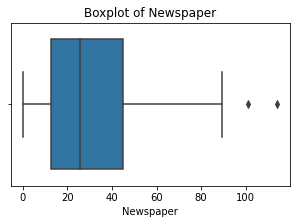

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each feature
for column in df.columns:
    if column != 'Sales':  # Assuming 'Sales' is the dependent variable
        plt.figure(figsize=(5,3))
        sns.boxplot(df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

- **seaborn.pairplot** are  creates a matrix of scatter plots for each pair of variables in a DataFrame and also displays histograms or KDE plots along the diagonal.



- It helps in visualizing the pairwise relationships between variables in a dataset.

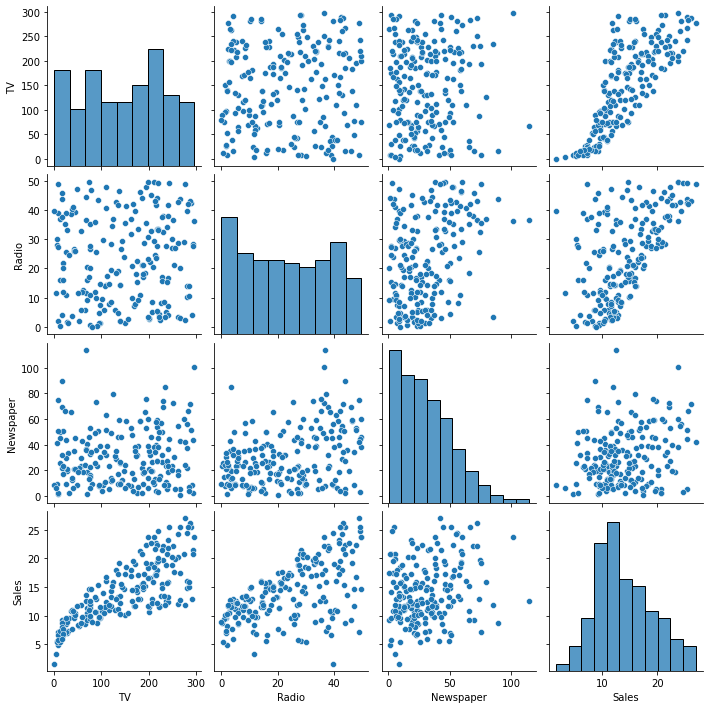

In [13]:
p = sns.pairplot(df)

### <font color='red'> Linearity:</font>

- Linear regression needs the relationship between the independent and dependent variables to be linear.

In [14]:
# Calculate the correlation matrix
corr_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Print the correlation matrix
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


- Correlation values range from -1 to 1

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 indicates no correlation.

The **heatmap** will use color to represent the strength of the correlations.

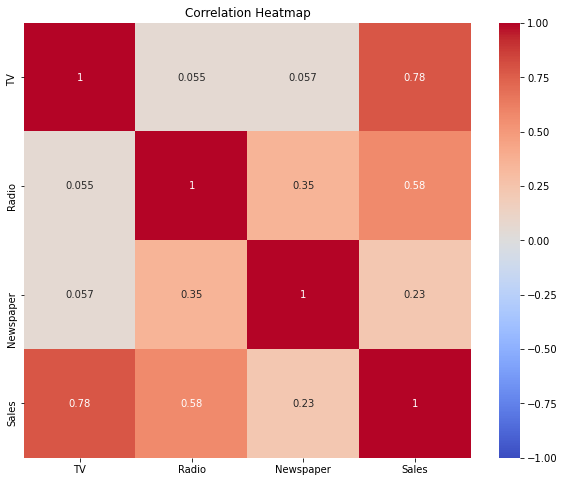

In [15]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

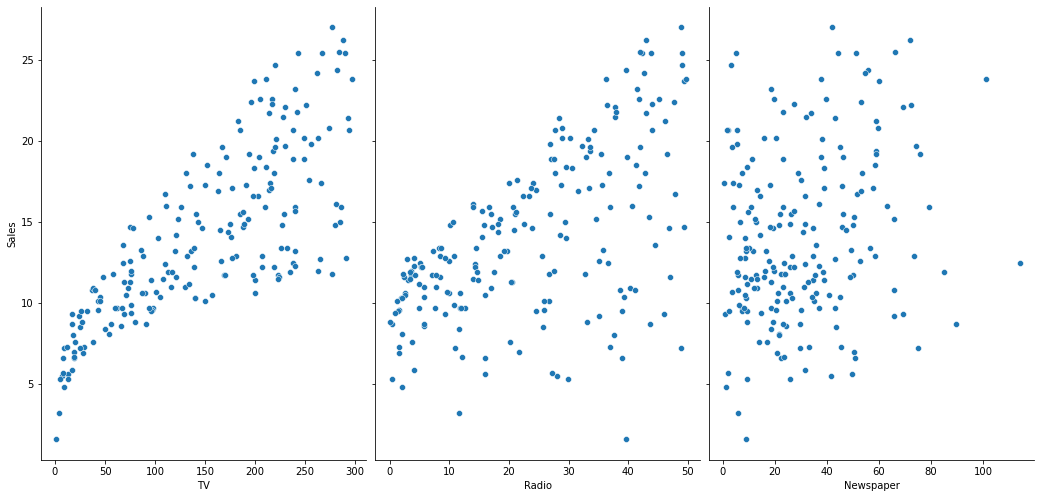

In [16]:
# visualize the relationship between the features and the response using scatterplots

a = sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

By looking at the above pairplot and heatmap  Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper.

### <font color='red'> No Multicollinearity:</font>

**VIF Values:**


-  VIF < 5: Generally considered acceptable.


- 5 <= VIF < 10: Moderate multicollinearity.



- VIF >= 10: High multicollinearity, which may be problematic.

In [17]:
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df[['TV', 'Radio', 'Newspaper']].corr()

print(correlation_matrix)

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


In [18]:
# Prepare the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


The VIF values for TV, Radio, and Newspaper are all well below 5, and even below 2. This suggests that there is **no significant multicollinearity** issue in our dataset. Each of these independent variables is relatively independent of the others.

In [20]:
x = df.drop(["Sales"],axis=1)
y = df.Sales

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Split the data into training and test sets**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression 
Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = Lr.predict(X_train)

y_pred

array([10.62420524, 19.5419182 , 18.37463236, 15.26284415, 10.02487307,
        8.17260763, 21.50975323, 14.14823568, 16.30996795,  8.85509348,
       15.23153021, 12.32242242, 13.64852005, 14.17607882, 18.40185911,
       19.24193422, 20.24381109, 17.44505298,  9.24109062, 11.75336116,
       19.79642606,  9.80950414, 20.80042258, 23.32343742, 10.13147045,
       17.3137333 , 19.53122711, 18.50680928, 16.84593627, 18.57944535,
       17.06456086,  8.86557659,  9.96958118,  5.33193027,  3.58046283,
       16.57691776, 12.86700495, 18.07899796, 11.79508257, 12.56748077,
       13.73208519,  6.99405932, 16.59518043,  9.77789051,  8.03719883,
       15.5975553 , 24.90100375, 11.03711104, 21.32059879, 13.71934146,
       10.80505837,  8.38304304, 12.37334698, 20.65712246, 10.4343308 ,
       14.56194942, 16.45430324, 17.23321262, 13.08271843, 17.40102398,
       21.23485322,  8.21816066, 16.128531  , 15.1627911 ,  8.7191981 ,
       13.85893495, 16.36845815,  9.50205237, 14.38866714, 18.11

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2.438917493390848


In [26]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.5617033948195311


In [27]:
# Calculate R² Score
r2 = r2_score(y_train, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9072183330817297


In [28]:
# Calculate Adjusted R² Score

# Number of observations and number of features
n = X_train.shape[0]
p = X_train.shape[1]

# Adjusted R² formula
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R² Score: {adj_r2}")

Adjusted R² Score: 0.9053118604738201


## Coefficients

In [29]:
coefficients = Lr.coef_
intercept = Lr.intercept_

# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Optionally, match each coefficient to its respective feature for clarity
feature_names = x.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef}")

Intercept: 14.051457996097845
Coefficients: [3.78203385 2.94717399 0.02525815]
Coefficient for TV: 3.7820338526201054
Coefficient for Radio: 2.9471739879566132
Coefficient for Newspaper: 0.025258146437505576


In [30]:
# Create a DataFrame to neatly display the coefficients and intercept
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': Lr.coef_
})

# Add intercept as a separate row
coeff_df.loc[len(coeff_df.index)] = ['Intercept', Lr.intercept_]

# Display the coefficients and intercept
print(coeff_df)

     Feature  Coefficient
0         TV     3.782034
1      Radio     2.947174
2  Newspaper     0.025258
3  Intercept    14.051458


**TV Coefficient (3.782034)**

- For each additional unit increase in TV advertising  Sales are expected to increase by approximately 3.78 units, holding all other factors constant.

- This relatively high coefficient suggests that TV advertising has a strong positive impact on sales.


**Radio Coefficient (2.947174):**

- For each additional unit increase in Radio advertising, Sales are expected to increase by approximately 2.95 units, assuming other variables remain constant.

- This also indicates a positive effect on Sales, though it’s slightly less than that of TV.


**Newspaper Coefficient (0.025258):**

- For each unit increase in Newspaper advertising, Sales increase by a much smaller amount, 0.025 units, holding all else constant.

- Newspaper advertising has a minimal impact on Sales in comparison to TV and Radio.

###  <font color='red'> Mean of the residuals should be zero:</font>

In [31]:
# Calculate Residuals
residuals = y_train - y_pred

# Calculate Mean of Residuals
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals}")

Mean of Residuals: -5.151434834260726e-16


Mean of the residuals Very close to zero so all good here

### <font color='red'>Check for Normality of error terms/residuals:</font>


- With the help of  **distribution plot, Q-Q Plot** we can check Check for Normality of error terms.





- with the help of Statistical Tests  **Shapiro-Wilk Test  (sample sizes),    Kolmogorov-Smirnov Test  (larger sample sizes)** we can check Check for Normality of error terms

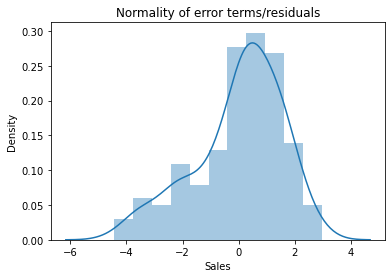

In [32]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

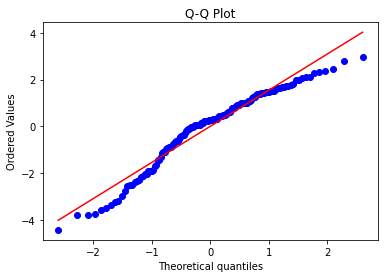

In [33]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The residual terms are pretty much normally distributed.

### <font color='red'>NO Heteroscedasticity:</font>

Checking heteroscedasticity : Using **Goldfeld Quandt** we test for heteroscedasticity.

In [34]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Assuming you already have your residuals and X_train

# Perform the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(residuals, X_train)

# The output might be more than 2 values. Check what it contains.
print("Goldfeld-Quandt test results:", test)

# Extract F statistic and p-value from the test result
# Typically, the output includes F-statistic and p-value at positions 0 and 1 respectively
f_statistic = test[0]
p_value = test[1]

# Print results
name = ['F statistic', 'p-value']
print(lzip(name, [f_statistic, p_value]))

# Conclusion
if p_value < 0.05:
    print("Reject the Null Hypothesis: Heteroscedasticity is present ")
else:
    print("Accept the null hypothesis:  Heteroscedasticity is not present")


Goldfeld-Quandt test results: (1.1095600395272511, 0.33016677253163473, 'increasing')
[('F statistic', 1.1095600395272511), ('p-value', 0.33016677253163473)]
Accept the null hypothesis:  Heteroscedasticity is not present


- Here, we observe that the p-value is greater than 0.05. Thus, we **Accept the null hypothesis.** Therefore **heteroscedasticity is not present.** Hence we concludethat variance of the error terms are constant across the observations.

## <font color='green'>  Using statsmodel OLS :</font>

**When we Use this one**


- For theoretical understanding and detailed statistical analysis, OLS might be preferred.




- Using This means you can compute the coefficients directly using matrix operations, which can be computationally efficient for small to moderate-sized datasets.

In [35]:
import statsmodels.api as sm
X = df[["TV","Radio","Newspaper"]]
y = df['Sales']

x_cons=sm.add_constant(X)
x_cons.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [36]:
reg=sm.OLS(y ,x_cons).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        22:24:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

- **R-squared (0.897):**This value means that approximately 89.7% of the variance in the dependent variable is explained by the independent variables in our model.



- **Adjusted R-squared (0.896):** Adjusted R-squared adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of predictors. An adjusted R-squared close to the R-squared value indicates that adding predictors is not leading to overfitting and that our model is robust.

- **Good Model Fit:** Both R-squared and Adjusted R-squared values are close to 1, suggesting that our model fits the data well. The high values indicate that the model explains almost 90% of the variability in the outcome variable.